In [3]:
import random
import numpy as np, numpy.random

def generate_score(profile, certainty): #profile 1,2,3,4
    prof = [2,3,4]
    #prof.remove(profile)
    prof = random.sample(prof,3)
    prof.insert(profile-1,1)
    
    _sum = 100
    #n = 4 # questions
    #num = np.arange(1,n+1)
    #num = num / num.sum()

    num = np.random.normal(1,certainty,1000) #tweak second argument for scaling
    hist, bin_edges = np.histogram(num, bins = [0,1,2,3,4],density=True)

    rnd_array = np.random.multinomial(_sum, hist, size=1)[0]
#    print(f'fct{rnd_array} order {prof}')
    rnd_array = [rnd_array[i-1] for i in prof]
#    print(f'fct2{rnd_array}')
    
    return list(rnd_array)

def generate_score_dir(profile,fact): # 0..1 is wide spread, above 1 narrow spread
    num = -np.sort(-np.round(np.random.dirichlet(np.ones(4)*fact,size=1)*100))
    # add up to 100
    num[0,3] = num[0,3] + 100-np.sum(num)
    prof = list(np.arange(1,4))
    prof.insert(profile-1,0)

    rnd_array = [num[i] for i in prof]

    return list(rnd_array)

def calculate_ocai(df):
    df['clan_current'] = df.iloc[:,range(0,24,4)].mean(axis=1)
    df['adh_current'] = df.iloc[:,range(1,24,4)].mean(axis=1)
    df['hier_current'] = df.iloc[:,range(2,24,4)].mean(axis=1)
    df['mark_current'] = df.iloc[:,range(3,24,4)].mean(axis=1)

    df['clan_wanted'] = df.iloc[:,range(24,48,4)].mean(axis=1)
    df['adh_wanted'] = df.iloc[:,range(25,48,4)].mean(axis=1)
    df['hier_wanted'] = df.iloc[:,range(26,48,4)].mean(axis=1)
    df['mark_wanted'] = df.iloc[:,range(27,48,4)].mean(axis=1)
    return df

1a clan -> adh rooms toont sterkste verband, rest zwakker
2a adh -> mark fmb toont sterkste verband, rest zwakker
a = grote verschillen tussen as is en to be
b = kleine verschillen tussen as is en to be
1b clan -> adh
2b adh -> mark
151 personeelsleden

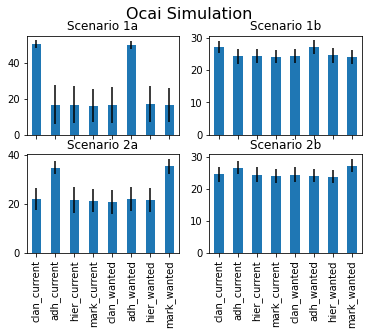

In [10]:
from functools import reduce
from operator import add
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(0)

# for reference ['clan', 'adh', 'hier', 'mark'] correspond to profiles 1,2,3,4

colnames = list()
foci = ['DomChar_','OrgLead_','ManEmpl_','OrgGlue_','StrEmph_','SucCrit_']
#qs = ['mark', 'hier', 'adh', 'clan'] # dominated order from low to high
qs_c = ['Clan_Current', 'Adho_Current', 'Hier_Current', 'Mark_Current'] #wanted 1 mark 2 hier 3 adh 4 clan from low to high
qs_w = ['Clan_Wanted', 'Adho_Wanted', 'Hier_Wanted', 'Mark_Wanted'] #wanted 1 mark 2 hier 3 adh 4 clan from low to high

for focus in range(6):
    for q in range(4):
        colnames.append(''.join([foci[focus],qs_c[q]]))
        
for focus in range(6):
    for q in range(4):
        colnames.append(''.join([foci[focus],qs_w[q]]))

ncases = 151
data = list()#np.zeros(shape=(ncases,48))

#scenario 1a clan -> adh first x biggest differences than smaller diff from x to len
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True)

temp = list()
for i in range(ncases):
    if i < 20: #first 20 more certainty; certainty: less is more, low values more demarcated results
        cert = 0.2
    else:
        cert = 2
    for j in range(6):
        temp.append(generate_score(1,cert)) #clan
    for j in range(6):
        temp.append(generate_score(2,cert)) #adh
    temp = reduce(add ,temp)
    data.append(temp)
    temp = list()

dat2 = pd.DataFrame(data)
dat2.columns = colnames
dat2 = calculate_ocai(dat2)
dat2.to_excel('ocai_sc1a.xlsx',index=False)
avg = dat2.iloc[:,range(48,56,1)].mean(axis=0)
std = dat2.iloc[:,range(48,56,1)].std(axis=0)#/np.sqrt(ncases)
plot = avg.plot(ax=axs[0,0],kind='bar',yerr=std)#,colormap='OrRd_r',edgecolor='black',grid=False,figsize=8,2),ax=ax,position=0.45,error_kw=dict(ecolor='black',elinewidth=0.5, lolims=True),width=0.8)
axs[0,0].title.set_text('Scenario 1a')

#scenario 1b clan -> adh first x biggest differences than smaller diff from x to len
data = list()#np.zeros(shape=(ncases,48))

temp = list()
for i in range(ncases):
    if i < 20: #first 20 more certainty; certainty: less is more, low values more demarcated results
        cert = 0.4
    else:
        cert = 4
    for j in range(6):
        temp.append(generate_score(1,cert)) #clan
    for j in range(6):
        temp.append(generate_score(2,cert)) #adh
    temp = reduce(add ,temp)
    data.append(temp)
    temp = list()

dat2 = pd.DataFrame(data)
dat2.columns = colnames

dat2 = calculate_ocai(dat2)
dat2.to_excel('ocai_sc1b.xlsx',index=False)
avg = dat2.iloc[:,range(48,56,1)].mean(axis=0)
std = dat2.iloc[:,range(48,56,1)].std(axis=0)#/np.sqrt(ncases)
plot = avg.plot(ax=axs[0,1],kind='bar',yerr=std)#,colormap='OrRd_r',edgecolor='black',grid=False,figsize=8,2),ax=ax,position=0.45,error_kw=dict(ecolor='black',elinewidth=0.5, lolims=True),width=0.8)
axs[0,1].title.set_text('Scenario 1b')


#scenario 2a adh -> mark first x biggest differences than smaller diff from x to len
data = list()#np.zeros(shape=(ncases,48))

temp = list()
for i in range(ncases):
    if i < 20: #first 20 more certainty; certainty: less is more, low values more demarcated results
        cert = 0.2
    else:
        cert = 2
    for j in range(6):
        temp.append(generate_score(2,cert)) #adh
    for j in range(6):
        temp.append(generate_score(4,cert)) #mark
    temp = reduce(add ,temp)
    data.append(temp)
    temp = list()

dat2 = pd.DataFrame(data)
dat2.columns = colnames

dat2 = calculate_ocai(dat2)
dat2.to_excel('ocai_sc2a.xlsx',index=False)
avg = dat2.iloc[:,range(48,56,1)].mean(axis=0)
std = dat2.iloc[:,range(48,56,1)].std(axis=0)#/np.sqrt(ncases)
plot = avg.plot(ax=axs[1,0],kind='bar',yerr=std)#,colormap='OrRd_r',edgecolor='black',grid=False,figsize=8,2),ax=ax,position=0.45,error_kw=dict(ecolor='black',elinewidth=0.5, lolims=True),width=0.8)
axs[1,0].title.set_text('Scenario 2a')

#scenario 2b adh -> mark first x biggest differences than smaller diff from x to len
data = list()#np.zeros(shape=(ncases,48))

temp = list()
for i in range(ncases):
    if i < 20: #first 20 more certainty; certainty: less is more, low values more demarcated results
        cert = 0.4
    else:
        cert = 4
    for j in range(6):
        temp.append(generate_score(2,cert)) #adh
    for j in range(6):
        temp.append(generate_score(4,cert)) #mark
    temp = reduce(add ,temp)
    data.append(temp)
    temp = list()

dat2 = pd.DataFrame(data)
dat2.columns = colnames

dat2 = calculate_ocai(dat2)
dat2.to_excel('ocai_sc2b.xlsx',index=False)

avg = dat2.iloc[:,range(48,56,1)].mean(axis=0)
std = dat2.iloc[:,range(48,56,1)].std(axis=0)#/np.sqrt(ncases)
plot = avg.plot(ax=axs[1,1],kind='bar',yerr=std)#,colormap='OrRd_r',edgecolor='black',grid=False,figsize=8,2),ax=ax,position=0.45,error_kw=dict(ecolor='black',elinewidth=0.5, lolims=True),width=0.8)
axs[1,1].title.set_text('Scenario 2b')
fig.suptitle("Ocai Simulation", fontsize=16)
plt.savefig('Ocai Simulation.pdf',bbox_inches='tight',dpi=300)
plt.show()
